In [1]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
from h2o.estimators import H2ODeepLearningEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 days 1 hour 43 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_rhy0h0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,22.16 Gb
H2O_cluster_total_cores:,30
H2O_cluster_allowed_cores:,30
H2O_cluster_status:,"locked, healthy"


# LOS Data Loading

In [2]:
X = pd.read_csv('/raid-18/CHS/jakeluo/share/notebook/ataleban@uwm.edu/Panc_/X.csv')  
Y = pd.read_csv('/raid-18/CHS/jakeluo/share/notebook/ataleban@uwm.edu/Panc_/Y.csv')  

In [3]:
X = X.drop(['Unnamed: 0','NCI','CCI'], axis=1)
X['died'] = Y['died']

In [4]:
col = X.columns

In [5]:
data = h2o.H2OFrame(X)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
target = 'los'
exclude = ['aweekend','amonth','drg_nopoa','hosp_division9.0','hosp_division1.0','hosp_division2.0','hosp_division3.0','hosp_division4.0','hosp_division5.0','hosp_division6.0','hosp_division7.0','hosp_division8.0','age_neonate','elective','mdc','mdc_nopoa','tran_in','zipinc_qrtl','pclass_orproc','pay15.0','pay10.0','pay16.0','pay13.0','pay11.0','year','los','hcup_ed2.0','hcup_ed0.0','i10_npr','totchg','pay14.0','pay12.0','hcup_ed1.0','pl_nchs','i10_necause','hcup_ed3.0','hcup_ed4.0',]
features = []
for i in col:
    if i != target and i not in exclude:
        features.append(i)

In [7]:
#train, test = data.split_frame(ratios=[0.8])
train_ratio, valid_ratio, test_ratio = 0.7, 0.1, 0.2
train, valid, test = data.split_frame(ratios=[train_ratio, valid_ratio])

## Plots

In [8]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Read the CSV file and extract the desired column
# df = pd.read_csv('your_file.csv')
column_name = 'los'
column_data = X[column_name]
# filtered_data = column_data
# Filter the column data within the desired range
filtered_data = column_data[(column_data >= 0) & (column_data <= 20)]

# Create the boxplot trace
boxplot_trace = go.Box(y=filtered_data, name=column_name)

# Create the layout with annotations
layout = go.Layout(
    title='Boxplot of ' + column_name + ' (0-20)',
    xaxis=dict(title=column_name),
    yaxis=dict(title='Values'),
    annotations=[
        # Annotations here
    ]
)

# Create the figure
fig = go.Figure(data=[boxplot_trace], layout=layout)

# Save the figure as PNG
output_file_png = 'boxplot.png'
pio.write_image(fig, output_file_png, format='png')

# Save the figure as HTML
output_file_html = 'boxplot.html'
pio.write_html(fig, output_file_html)


In [10]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Read the CSV file and extract the desired column
# df = pd.read_csv('your_file.csv')
column_name = 'los'
column_data = X[column_name]
# column_data = column_data[(column_data >= 0) & (column_data <= 20)]

# Create the histogram trace
histogram_trace = go.Histogram(x=column_data)

# Create the layout with annotations
layout = go.Layout(
    title='Histogram of ' + column_name,
    xaxis=dict(title=column_name),
    yaxis=dict(title='Frequency'),
    annotations=[
        # Annotations here
    ]
)

# Create the figure
fig = go.Figure(data=[histogram_trace], layout=layout)

# Save the figure as PNG
output_file_png = 'histogram.png'
pio.write_image(fig, output_file_png, format='png')

# Save the figure as HTML
output_file_html = 'histogram.html'
pio.write_html(fig, output_file_html)


In [21]:
count = sum(X['los'] > 25)
print(f"Number of values greater than 20: {count}")
print((count/len(X['los']))*100)

Number of values greater than 20: 1408
1.6310643621704277


In [15]:
len(X['los'])

86324

# Data Loading

In [12]:
X = pd.read_csv('/raid-18/CHS/jakeluo/share/notebook/ataleban@uwm.edu/Panc_/X_Cleared_Balance1.5.csv')  
Y = pd.read_csv('/raid-18/CHS/jakeluo/share/notebook/ataleban@uwm.edu/Panc_/Y_Cleared_Balance1.5.csv')  

In [13]:
y1 = Y['0']
xe = X
xe = xe.drop(['Unnamed: 0'], axis=1)


for i in xe.columns:
    if i == 'age':
        continue
    xe[i] = xe[i].astype('category')
    
y1 = y1.astype('category')

In [14]:
xe['died'] = y1

In [15]:
data = h2o.H2OFrame(xe)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
data['los'] = [] 

H2OTypeError: Argument `value` should be a None | numeric | string | H2OFrame, got list []

In [17]:
col = xe.columns

In [18]:
data['died'] = data['died'].asfactor()

In [19]:
train, test = data.split_frame(ratios=[0.8])

In [20]:
# target = 'los'
# features = []
# for i in xe.columns:
#     if i != target:
#         features.append(i)

In [60]:
target = 'los'
exclude = ['aweekend','amonth','drg_nopoa','hosp_division9.0','hosp_division1.0','hosp_division2.0','hosp_division3.0','hosp_division4.0','hosp_division5.0','hosp_division6.0','hosp_division7.0','hosp_division8.0','age_neonate','elective','mdc','mdc_nopoa','tran_in','zipinc_qrtl','pclass_orproc','pay15.0','pay10.0','pay16.0','pay13.0','pay11.0','year','los','hcup_ed2.0','hcup_ed0.0','i10_npr','totchg','pay14.0','pay12.0','hcup_ed1.0','pl_nchs','i10_necause','hcup_ed3.0','hcup_ed4.0',]
features = []
for i in col:
    if i != target and i not in exclude:
        features.append(i)
        print(i)

False

# Traditional

In [130]:
clf = H2OAutoML(max_models=10, seed=42)
clf.train(x=features, y=target, training_frame=train)

AutoML progress: |
13:24:44.646: _train param, Dropping bad and constant columns: [i10_birth, NEO051]

██
13:24:59.942: _train param, Dropping bad and constant columns: [i10_birth, NEO051]

█████████
13:25:12.834: _train param, Dropping bad and constant columns: [i10_birth, NEO051]

██████████████
13:28:16.358: _train param, Dropping bad and constant columns: [i10_birth, NEO051]


13:28:31.457: _train param, Dropping bad and constant columns: [i10_birth, NEO051]

████████████████████████████████████
13:46:09.441: _train param, Dropping bad and constant columns: [i10_birth, NEO051]


13:47:45.34: _train param, Dropping bad and constant columns: [i10_birth, NEO051]


13:49:26.588: _train param, Dropping bad and constant columns: [i10_birth, NEO051]

█
13:51:30.447: _train param, Dropping bad and constant columns: [i10_birth, NEO051]


13:53:26.788: _train param, Dropping bad and constant columns: [i10_birth, NEO051]


14:05:22.538: _train param, Dropping unused columns: [i10_birth, NEO05

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [131]:
leaderboard = clf.leaderboard
best_model = leaderboard[0]
print("Best model:", best_model.model_id)

# View the performance metrics of the best model
print(best_model)

AttributeError: 'H2OFrame' object has no attribute 'model_id'

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_6_20230502_132444,3.46778,12.0255,2.01961,nan,12.0255,1302,0.023326,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_6_20230502_132444,3.49305,12.2014,2.03057,nan,12.2014,1015,0.008108,StackedEnsemble
GBM_2_AutoML_6_20230502_132444,3.50527,12.2869,2.06207,nan,12.2869,17039,0.00532,GBM
GBM_1_AutoML_6_20230502_132444,3.50707,12.2995,2.03819,nan,12.2995,35648,0.007041,GBM
GBM_3_AutoML_6_20230502_132444,3.51966,12.388,2.06204,nan,12.388,18603,0.005102,GBM
GBM_4_AutoML_6_20230502_132444,3.53827,12.5193,2.06744,nan,12.5193,25280,0.006424,GBM
XGBoost_3_AutoML_6_20230502_132444,3.63715,13.2289,2.11162,nan,13.2289,47727,0.00204,XGBoost
DRF_1_AutoML_6_20230502_132444,3.72518,13.877,2.18374,0.419937,13.877,202230,0.004678,DRF
XGBoost_2_AutoML_6_20230502_132444,3.78059,14.2929,2.17915,nan,14.2929,2799,0.001982,XGBoost
XGBoost_1_AutoML_6_20230502_132444,3.84908,14.8154,2.24536,nan,14.8154,3313,0.004477,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

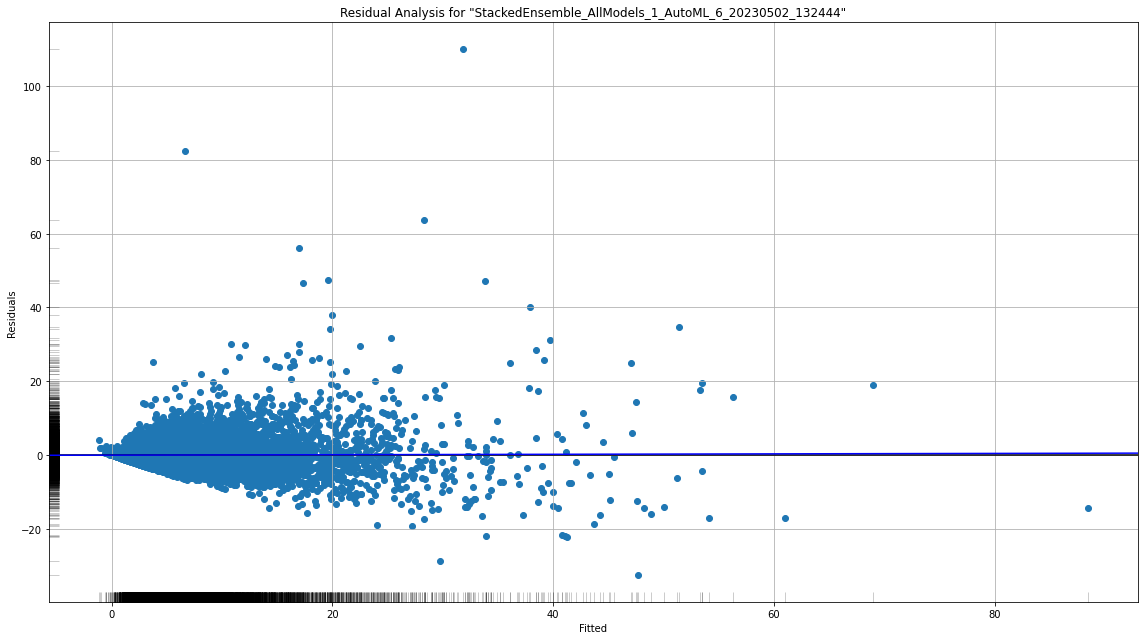

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

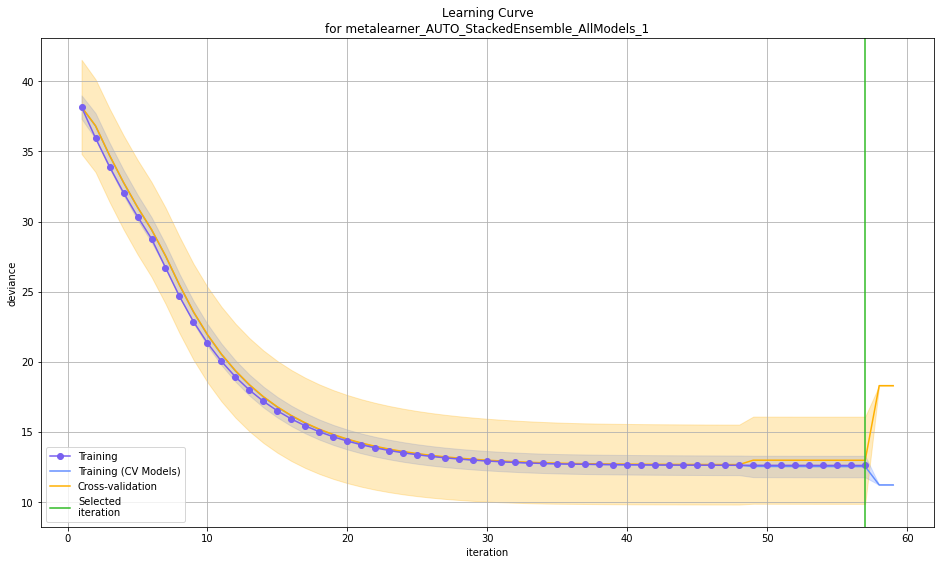

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

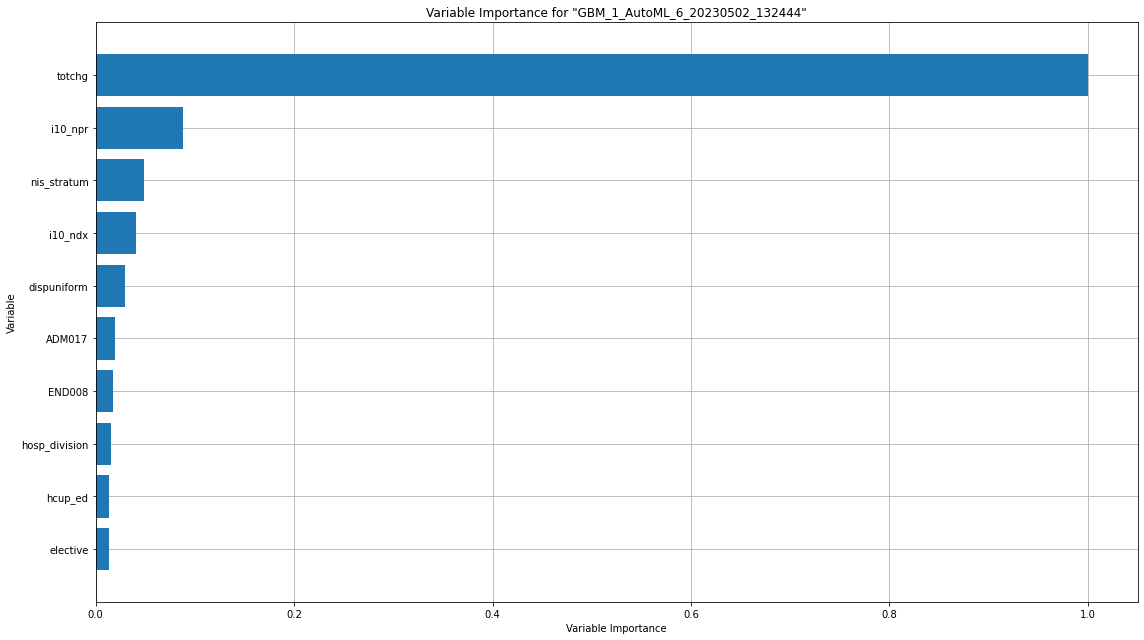

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

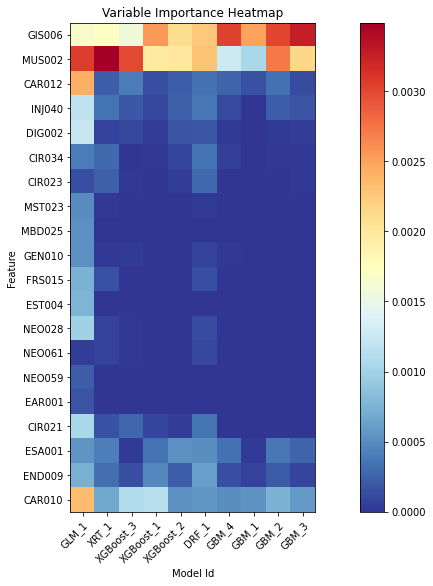

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

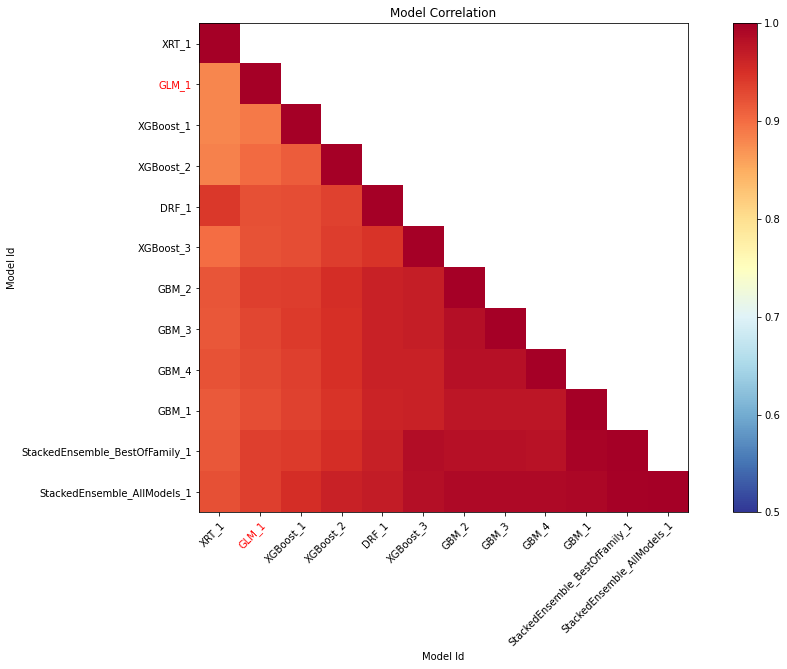

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

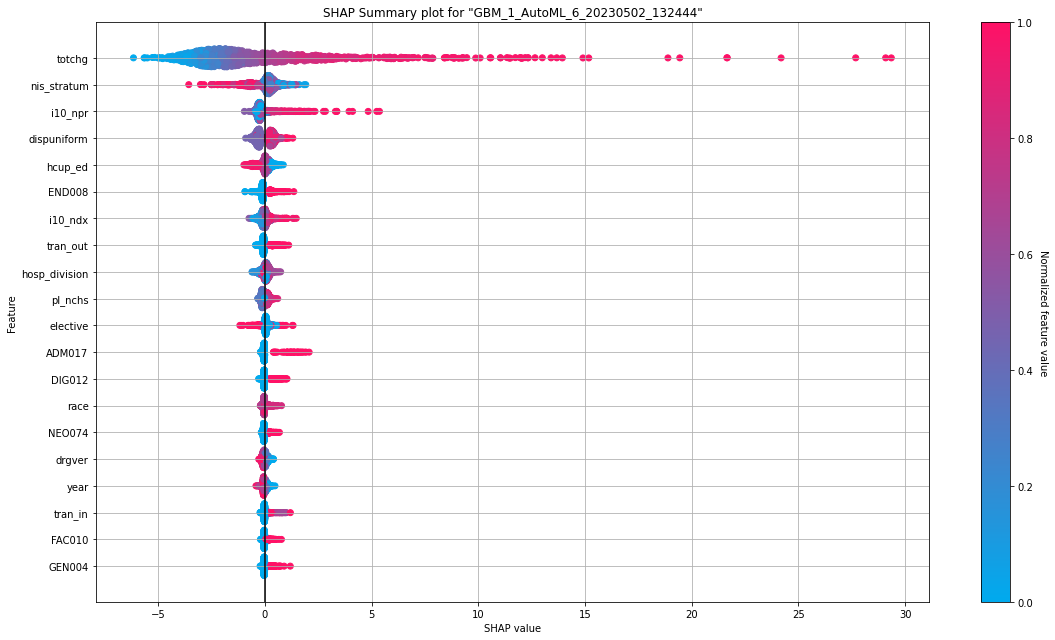

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

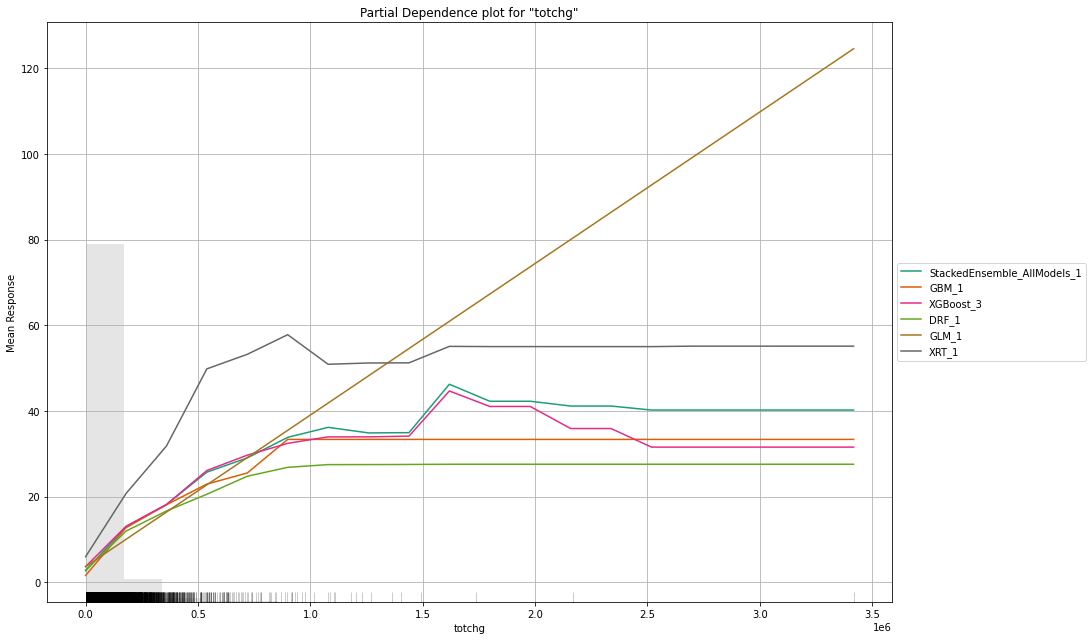

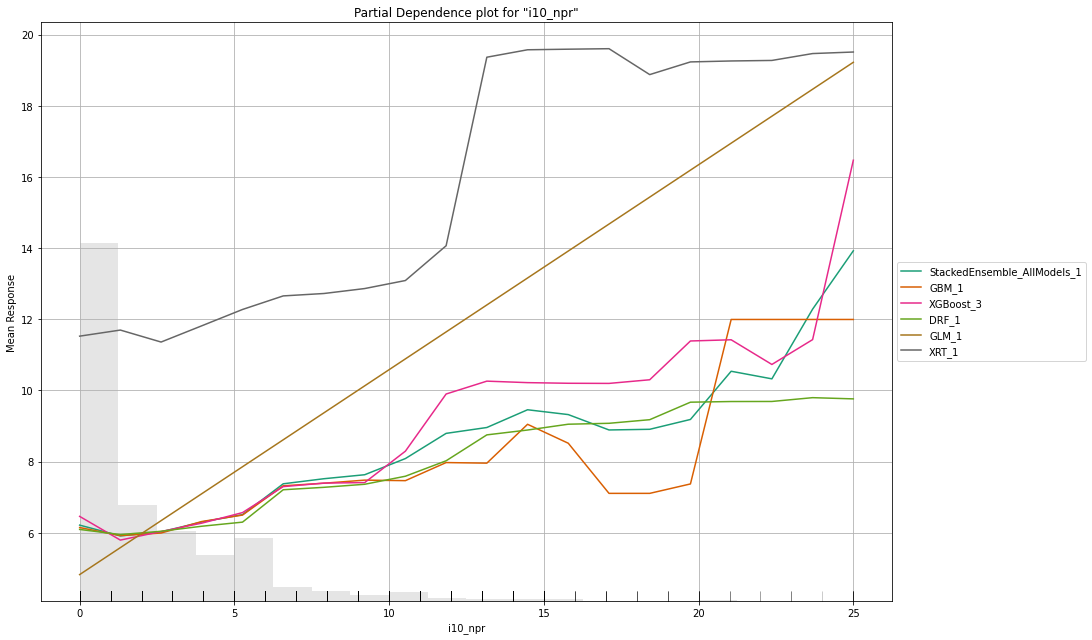

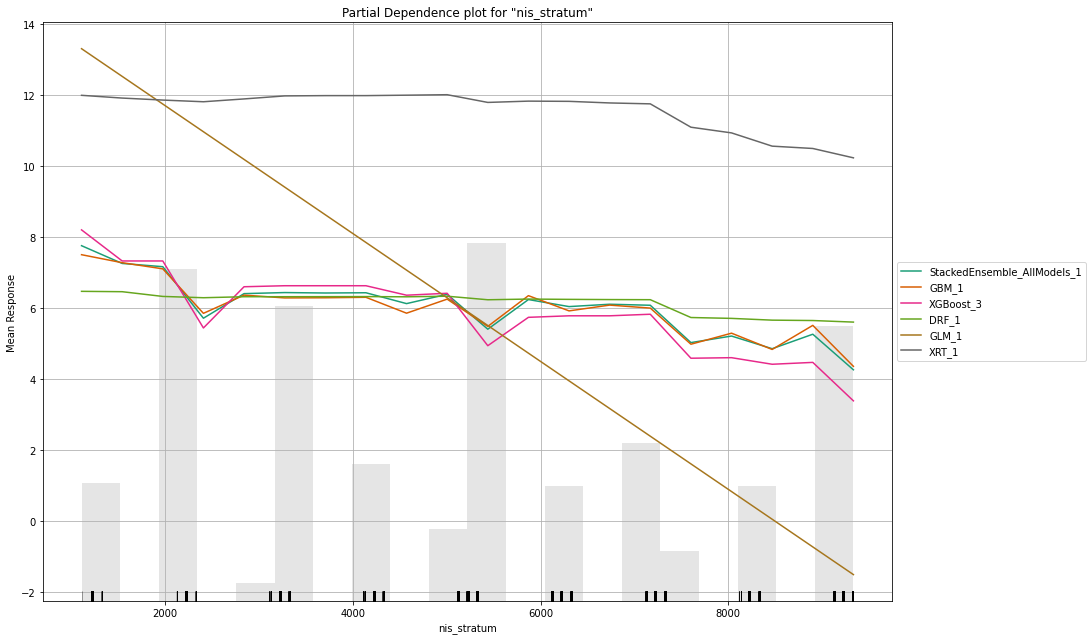

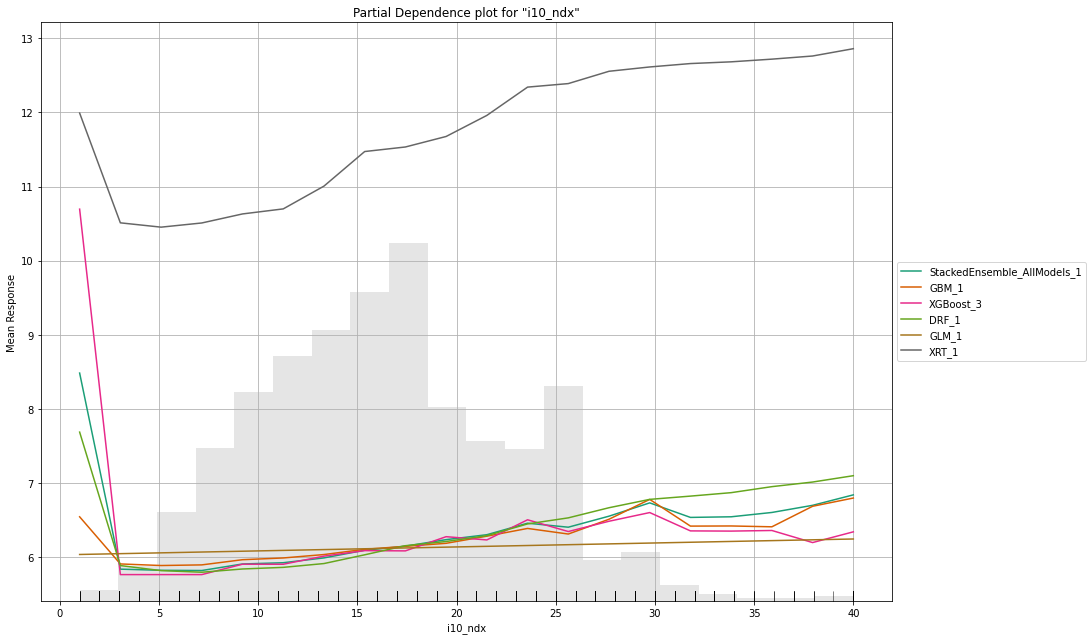

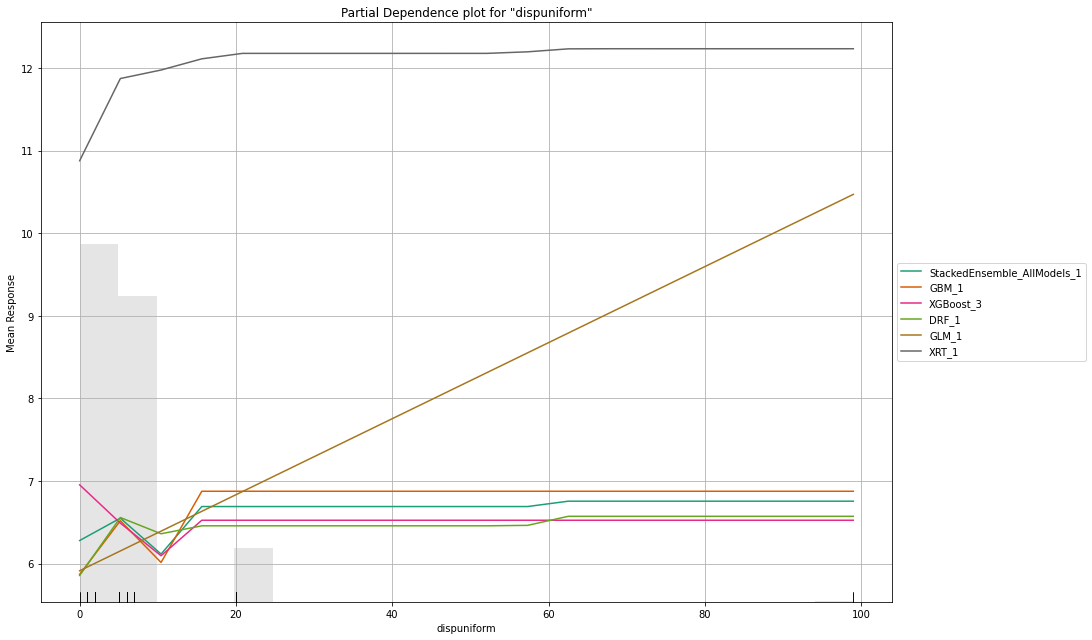

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

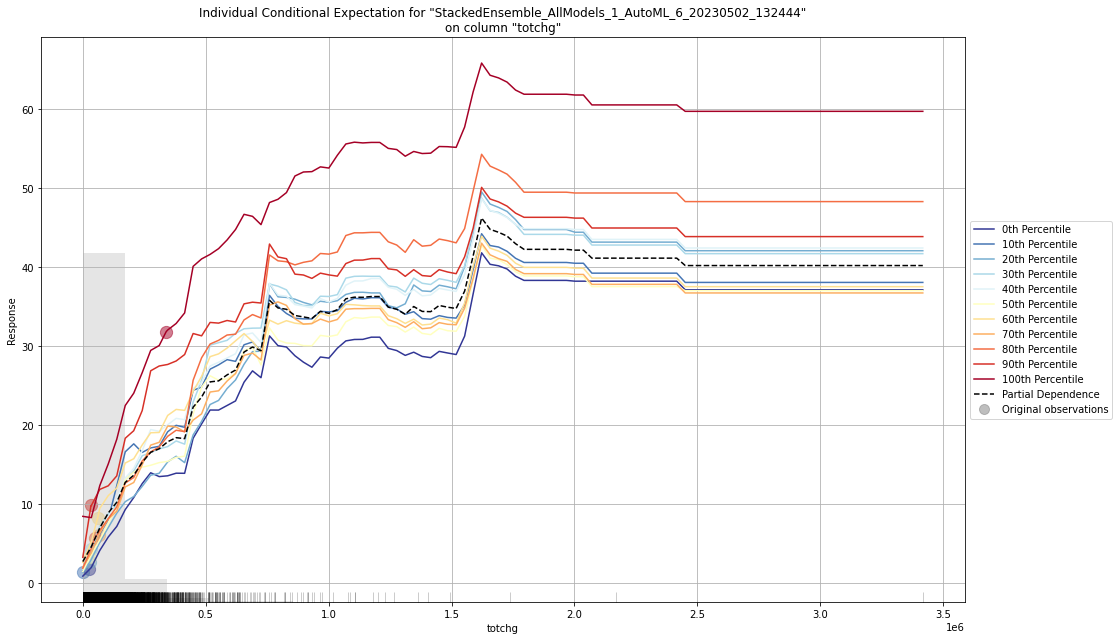

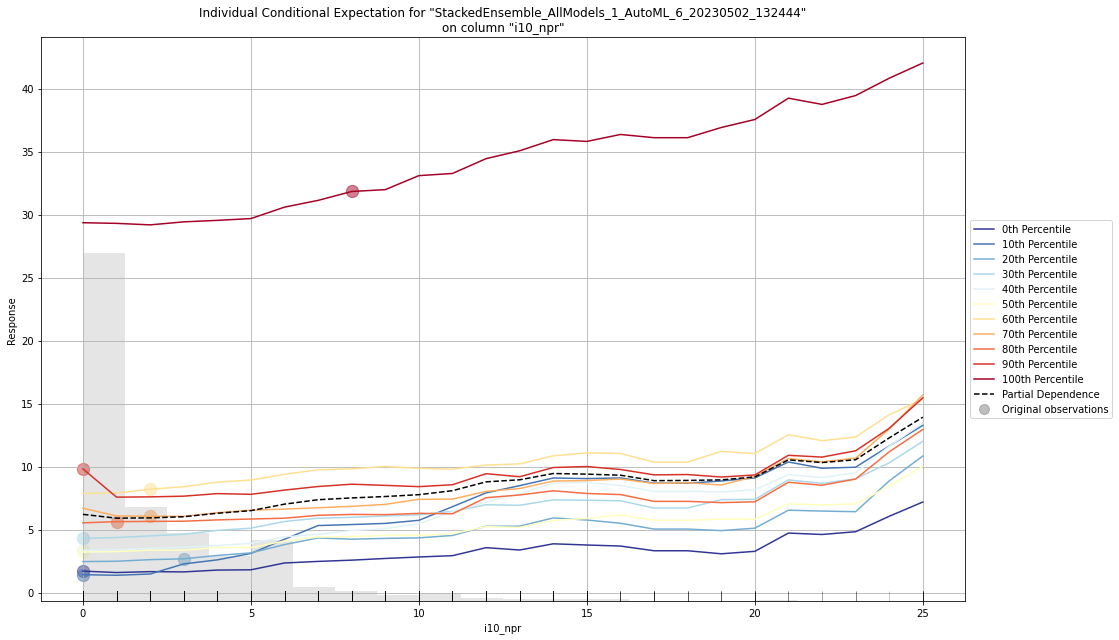

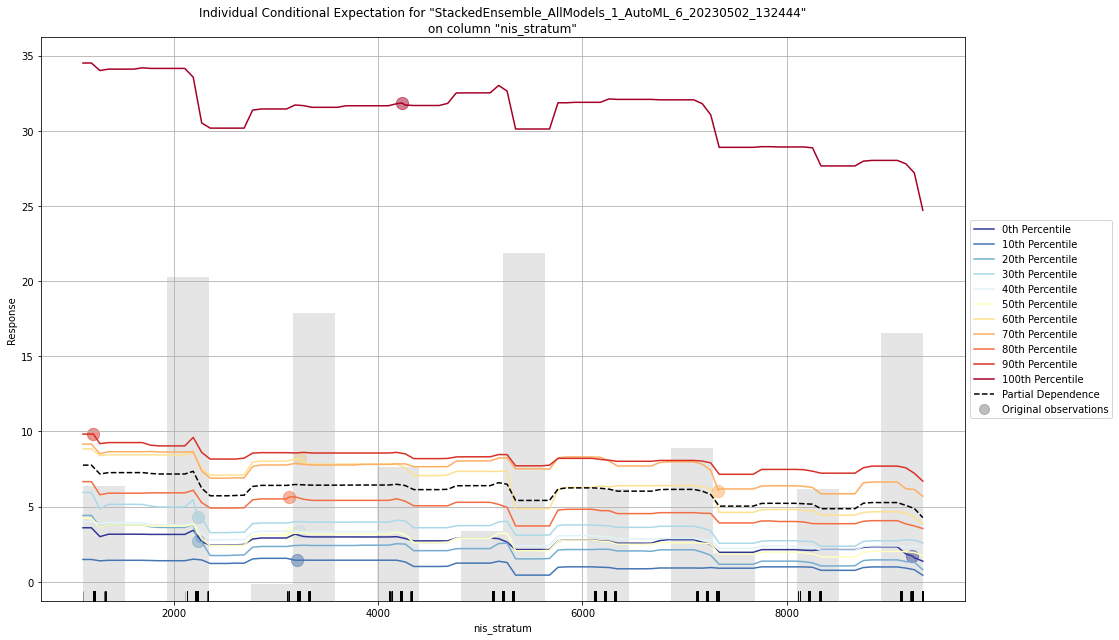

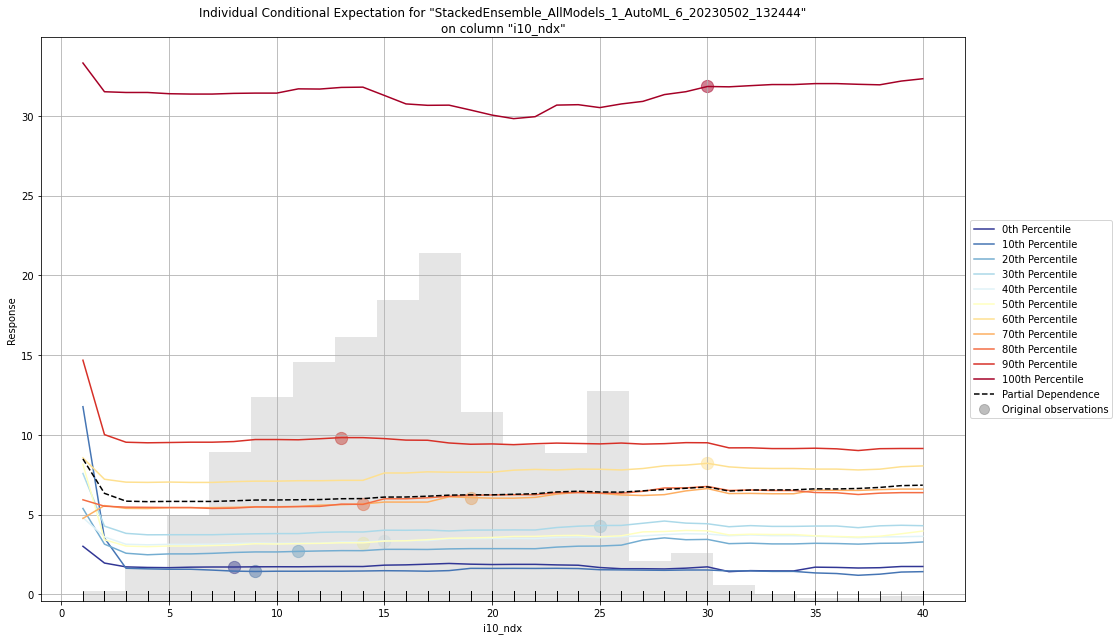

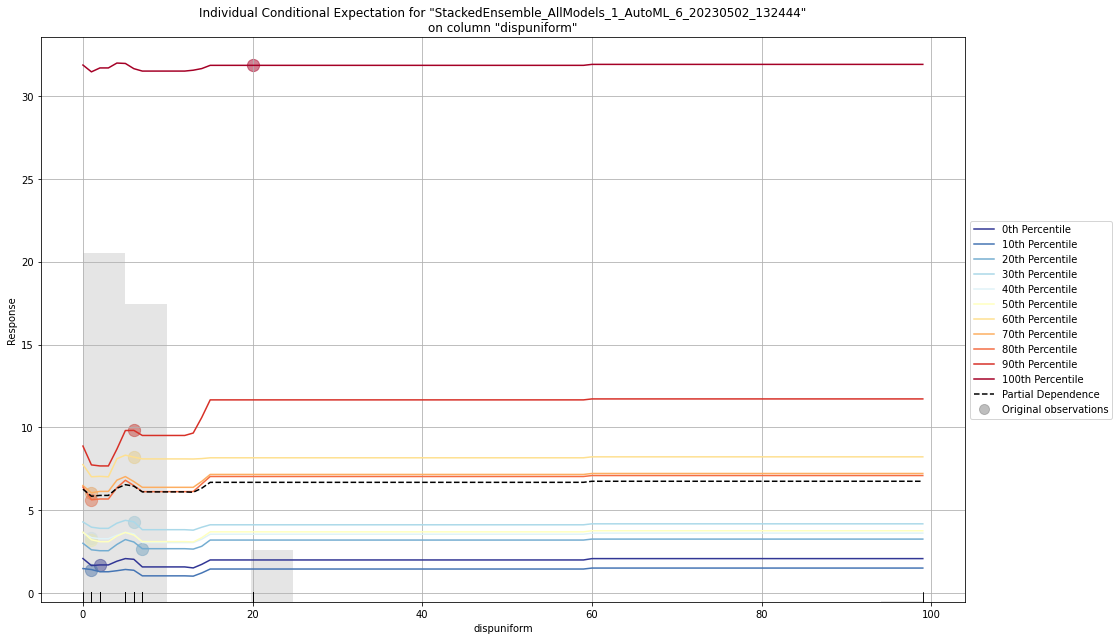



H2OExplanation([('leaderboard', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x2afbbca0ec70>), ('description', <h2o.explanation._explain.Description object at 0x2afbbe844190>), ('data', H2OFrame({'_ex': <Expr(makeLeaderboard ['StackedEnsemble_AllModels_1_AutoML_6_20230502_132444', 'StackedEnsemble_BestOfFamily_1_AutoML_6_20230502_132444', 'GBM_1_AutoML_6_20230502_132444', 'GBM_3_AutoML_6_20230502_132444', 'GBM_4_AutoML_6_20230502_132444', 'GBM_2_AutoML_6_20230502_132444', 'XGBoost_3_AutoML_6_20230502_132444', 'DRF_1_AutoML_6_20230502_132444', 'XGBoost_2_AutoML_6_20230502_132444', 'XGBoost_1_AutoML_6_20230502_132444', 'GLM_1_AutoML_6_20230502_132444', 'XRT_1_AutoML_6_20230502_132444'] 'py_525_sid_b601' 'AUTO' 'ALL' 'AUTO')#py_908_sid_b601>}))])), ('residual_analysis', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x2afbbe844040>), ('description', <h2o.explanation._explain.Description object at 0x2afbbe8447f0>), ('plots', H2OExplanation(

In [132]:
leader_model = clf
explanation = leader_model.explain(test)
print(explanation)

In [11]:
perf = clf.leader.model_performance(test_data=test)
print(perf)


NameError: name 'clf' is not defined

# DeepLearning

In [8]:
dl = H2ODeepLearningEstimator(
                           distribution = 'tweedie',
                           hidden=[100,100],
                           epochs=70,
                           train_samples_per_iteration=-1,
                           reproducible=True,
                           activation="Tanh",
                           single_node_mode=False,
                           balance_classes=False,
                           force_load_balance=False,
                           seed=42,
                           score_training_samples=0,
                           score_validation_samples=0,
                           stopping_rounds=0)

In [9]:
dl.train(x=features,
      y=target,
      training_frame=data,
                validation_frame=valid)

deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/NIS2016/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [i10_birth, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1685815804070_211


Status of Neuron Layers: predicting los, regression, tweedie distribution, Automatic loss, 73,801 weights/biases, 975.5 KB, 6,042,680 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate               rate_rms               momentum    mean_weight           weight_rms           mean_bias            bias_rms
--  -------  -------  ------  ---------  ----  ----  ----------------------  ---------------------  ----------  --------------------  -------------------  -------------------  -----------------------
    1        635      Input   0.0
    2        100      Tanh    0.0        0.0   0.0   0.07874055374778025     0.09887728095054626    0.0         -0.04707685838168924  0.3362473249435425   0.08742624585788528  0.6870191097259521
    3        100      Tanh    0.0        0.0   0.0   0.00440073246062966     0.006019687280058861   0.0         -0.00344647933925051  0.4542057514190674   0.6219211480130195   2.035421371459961
    4        1        Linear             0.0   0.0   0.00012489421984355432  9.031849913299084e-06  0.0         -0.02310839988524094  0.12605291604995728  6.6668175964354806   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 11.242156791138552
RMSE: 3.3529325658501623
MAE: 1.8606898061860635
RMSLE: 0.3840638215711248
Mean Residual Deviance: 0.524272788206623

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 10.474184671509203
RMSE: 3.2363845061285907
MAE: 1.8523531282290355
RMSLE: 0.38556064772754567
Mean Residual Deviance: 0.5189589354895479

Scoring History: 
     timestamp            duration           training_speed    epochs    iterations    samples    training_rmse       training_deviance    training_mae        training_r2          validation_rmse     validation_deviance    validation_mae      validation_r2
---  -------------------  -----------------  ----------------  --------  ------------  ---------  ------------------  -------------------  ------------------  -------------------  ------------------  ---------------------  ------------------  -------------------
     2023-06-05 03:42:54  0.000 sec                            0.0       0             0.0        nan                 nan                  nan                 nan                  nan                 nan                    nan                 nan
     2023-06-05 03:46:53  4 min 15.370 sec   360 obs/sec       1.0       1             86324.0    4.910969913828352   1.0158825545201435   2.876087288222343   0.3680363137271687   4.852135801925967   0.9956045424736252     2.8180133747903136  0.36033241052575204
     2023-06-05 03:51:02  8 min 20.984 sec   365 obs/sec       2.0       2             172648.0   4.818610764627472   0.9885855139792229   2.873195333314215   0.39158309902572985  4.761602560035473   0.9716362116188529     2.820829436080182   0.3839801059162744
     2023-06-05 03:55:12  12 min 30.474 sec  364 obs/sec       3.0       3             258972.0   4.8283108281528495  1.0232944971541507   3.015355022229329   0.38913109655283107  4.828064947611139   1.0267661314940035     2.994190795158501   0.3666632939990653
     2023-06-05 03:59:25  16 min 43.898 sec  362 obs/sec       4.0       4             345296.0   4.699735406720531   0.9582088251772559   2.8239450648110958  0.4212321577121342   4.681832793800636   0.9470651213433396     2.7919477008511353  0.4044472281229132
     2023-06-05 04:03:37  20 min 54.966 sec  362 obs/sec       5.0       5             431620.0   4.602671701119526   0.9215970067757254   2.7313699603810857  0.4448918878050315   4.528720864924098   0.9025914874878632     2.688471874453637   0.44276349737092013
     2023-06-05 04:07:47  25 min  6.287 sec  361 obs/sec       6.0       6             517944.0   4.594612612217951   0.9197388172890923   2.657471525003108   0.4468341288

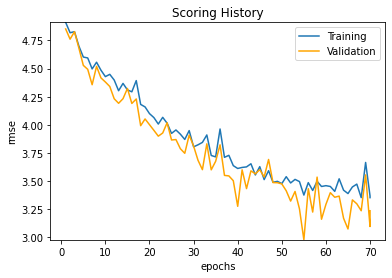

In [10]:
dl.plot()

In [13]:
feat_imp = dl.varimp(use_pandas=True)
print(feat_imp)

        variable  relative_importance  scaled_importance  percentage
0         totchg             1.000000           1.000000    0.020528
1        i10_npr             0.436676           0.436676    0.008964
2        i10_ndx             0.408721           0.408721    0.008390
3    dispuniform             0.184317           0.184317    0.003784
4           died             0.177930           0.177930    0.003653
..           ...                  ...                ...         ...
645       INF004             0.043699           0.043699    0.000897
646       MBD014             0.043017           0.043017    0.000883
647       INF007             0.042979           0.042979    0.000882
648       MBD007             0.041371           0.041371    0.000849
649       SYM015             0.041166           0.041166    0.000845

[650 rows x 4 columns]


In [ ]:
feat_imp.to_csv('LOS_Fet_importance.csv')

In [14]:
perf = dl.model_performance(test)
perf

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 10.830144174311453
RMSE: 3.2909184393283666
MAE: 1.8828641235678658
RMSLE: 0.3858962340907795
Mean Residual Deviance: 0.5042600841891437

In [15]:
pred = dl.predict(test)
pred

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
4.1314
2.07909
3.96896
4.3479
2.41631
2.79732
6.15542
11.5183
12.1565
2.01912


In [16]:
test[target]

los
6
1
2
2
3
1
4
11
14
2


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

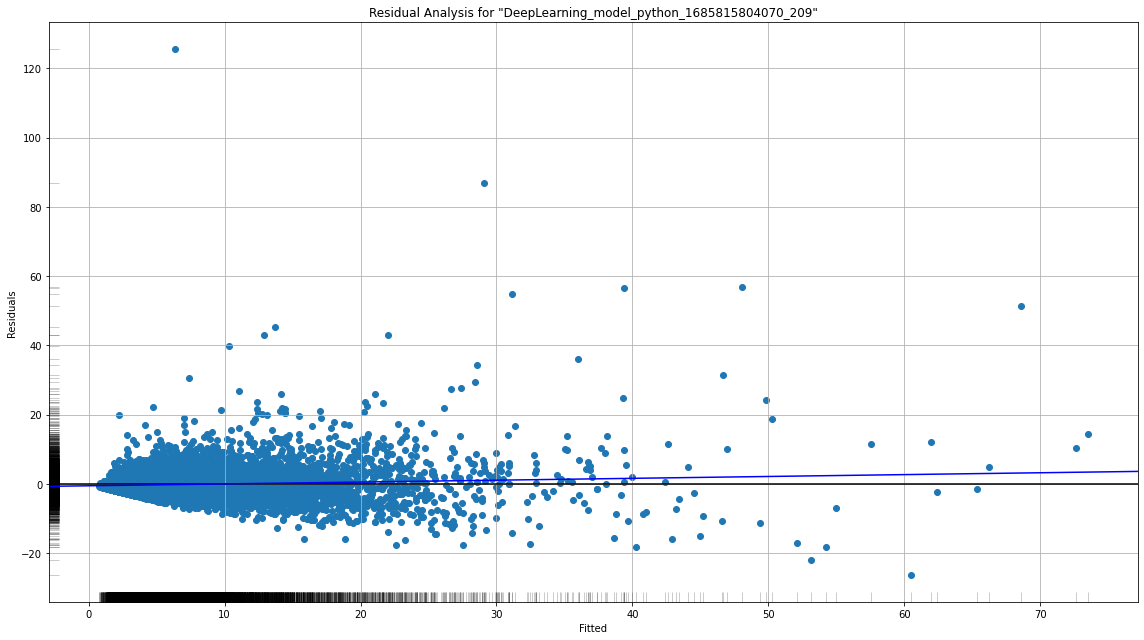

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

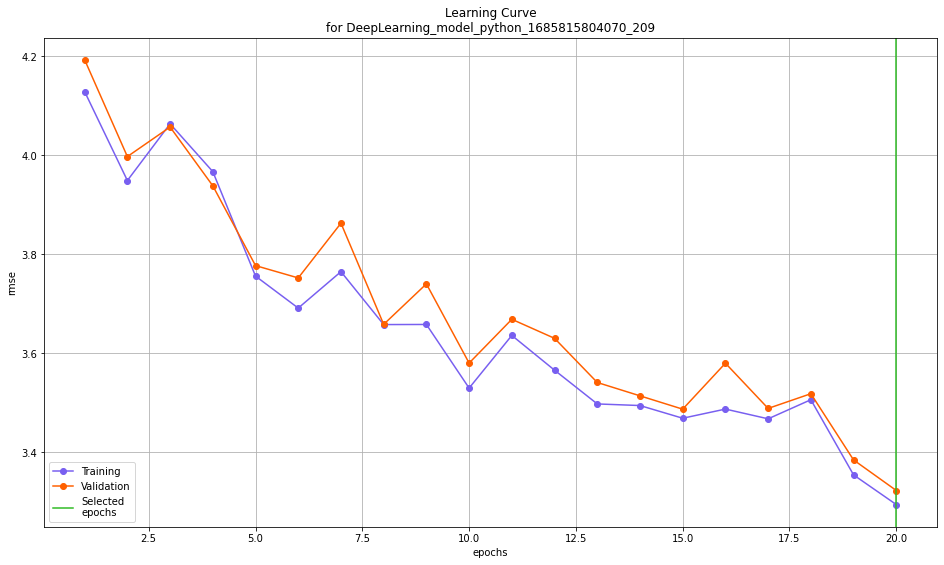

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

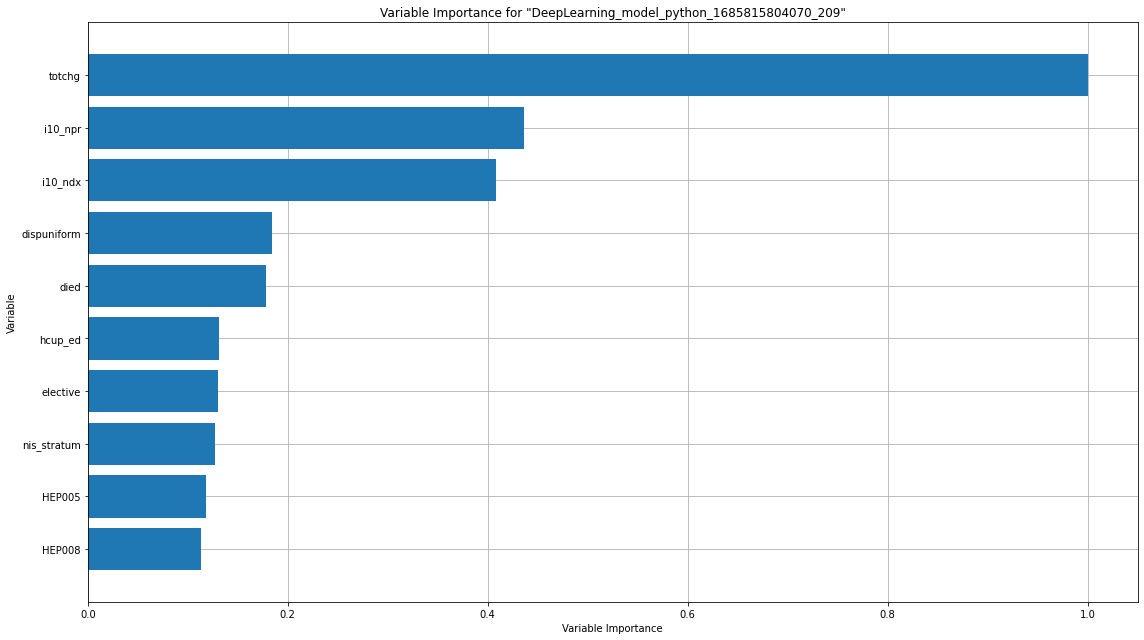

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

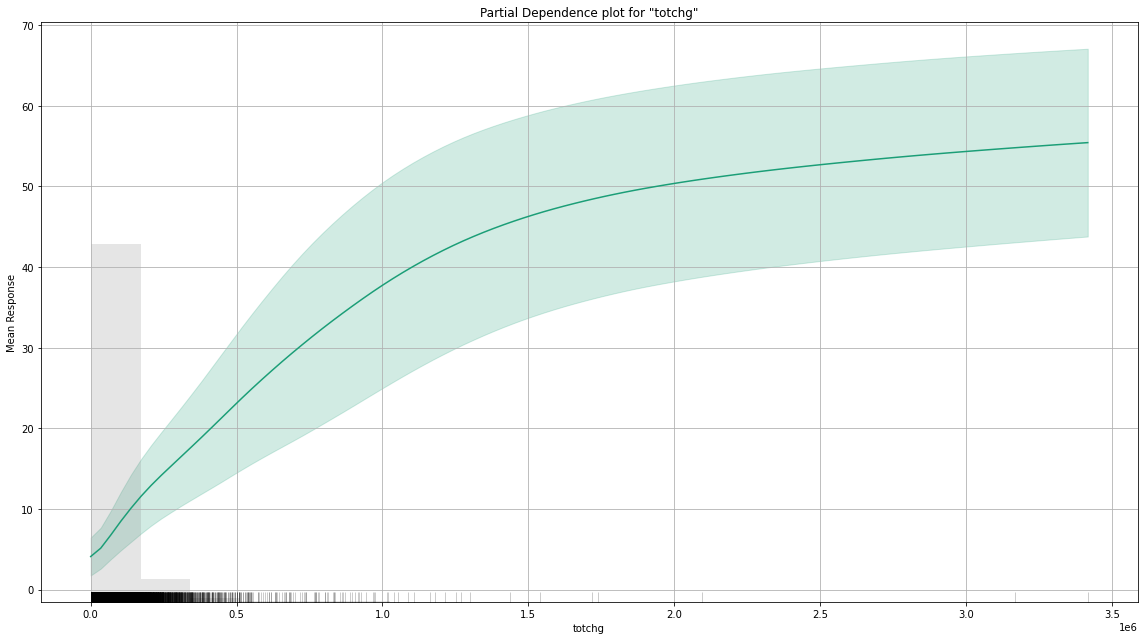

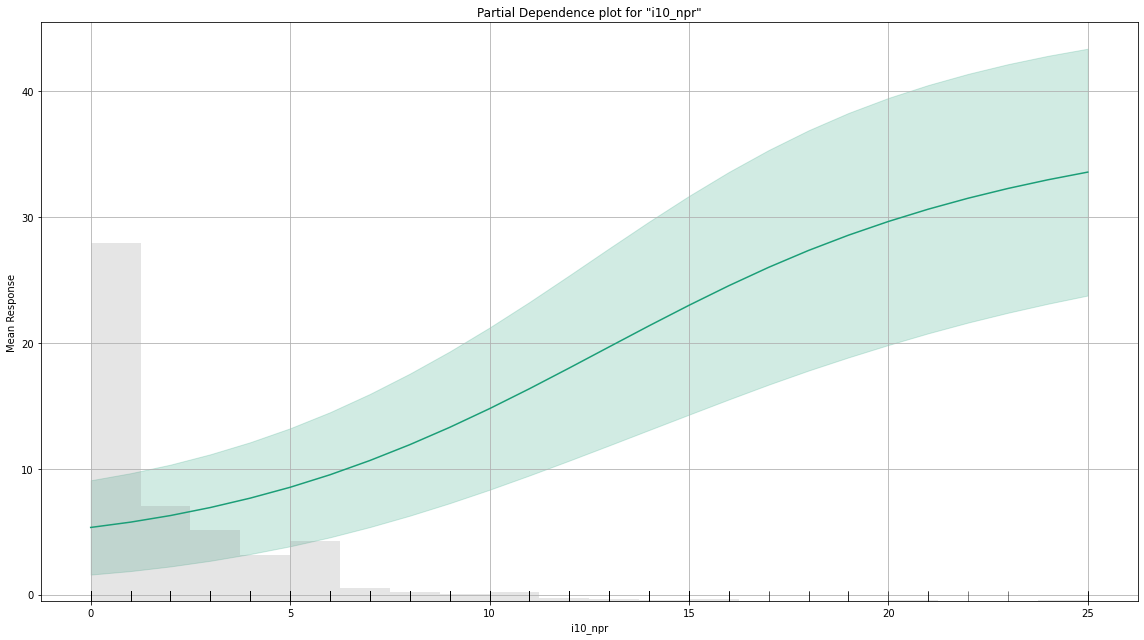

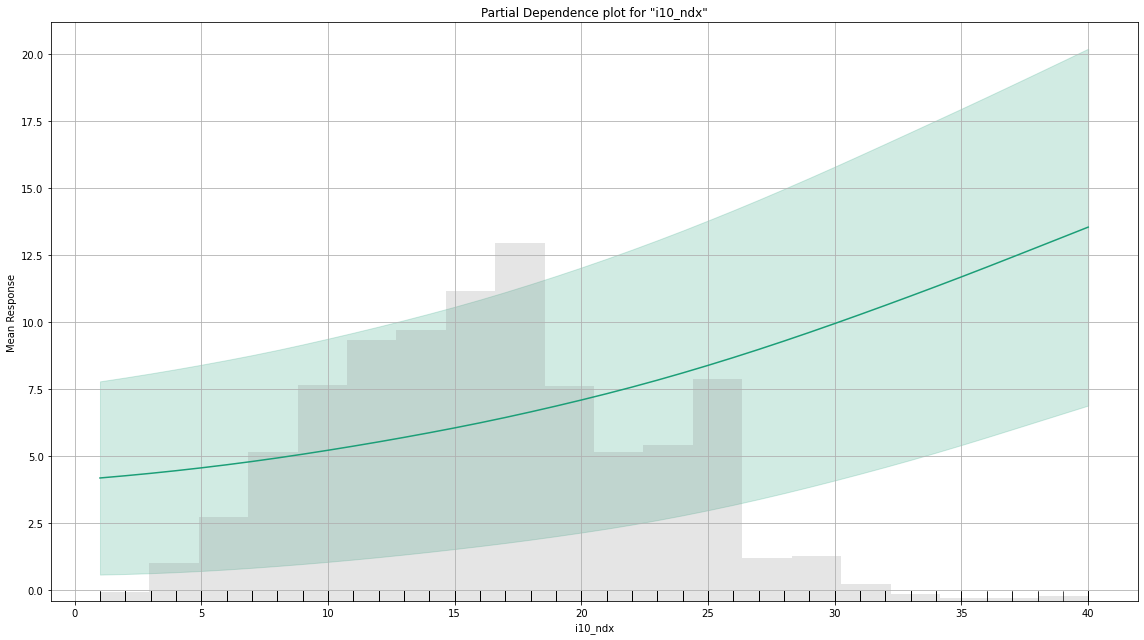

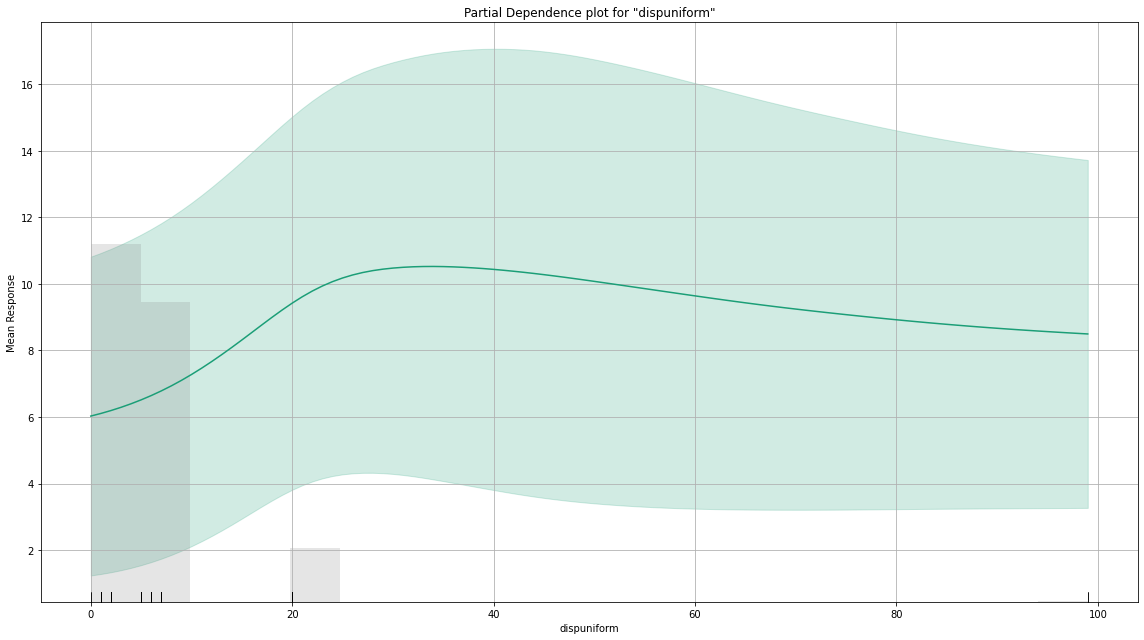

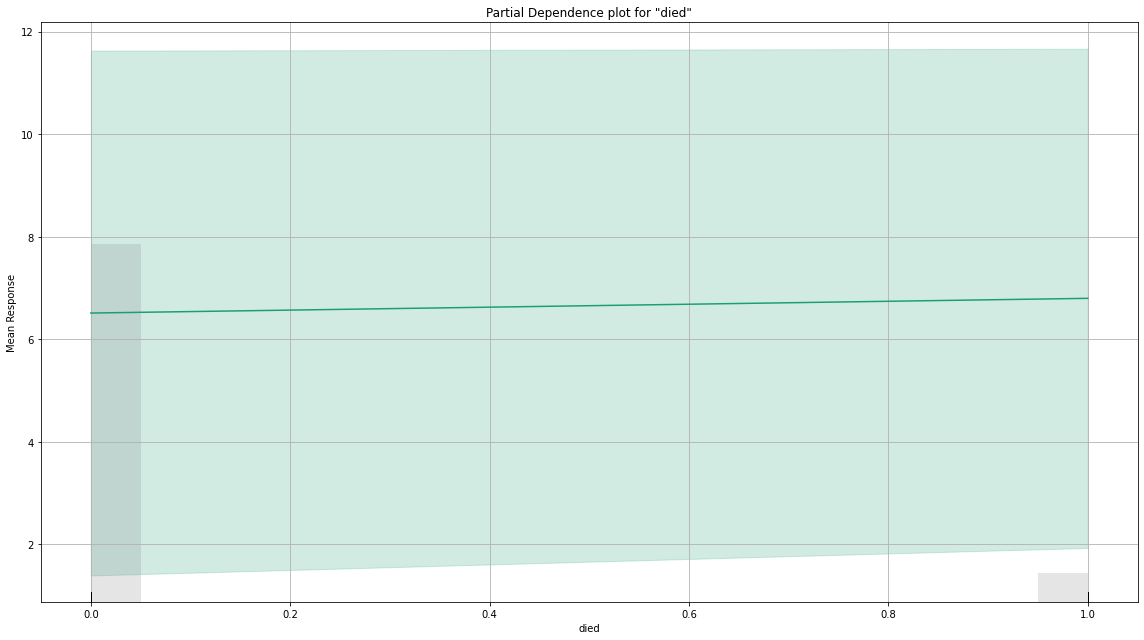

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

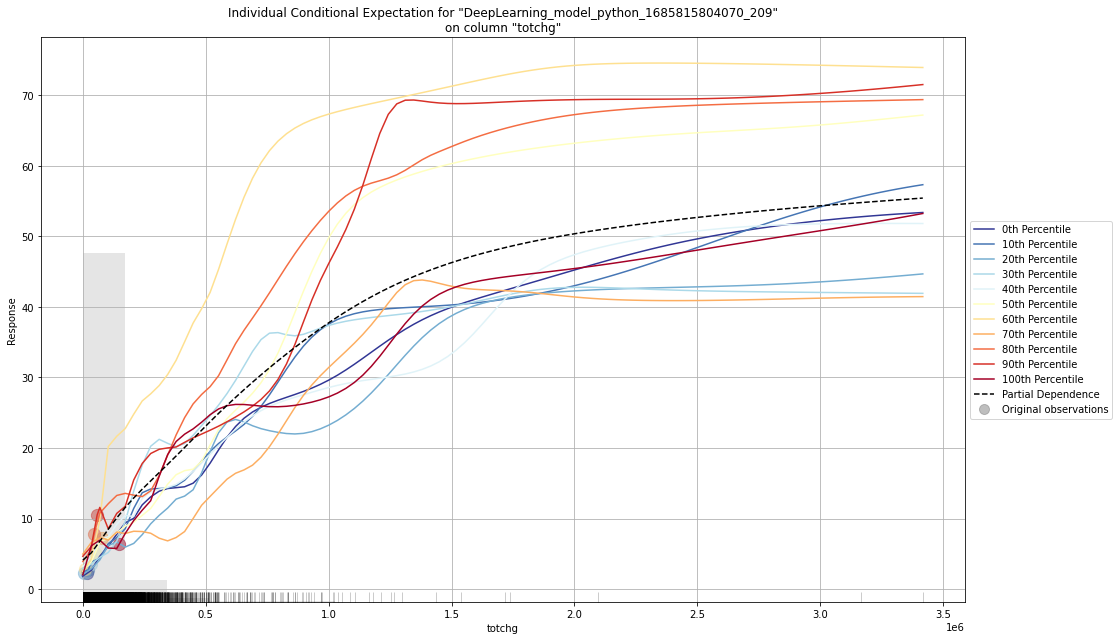

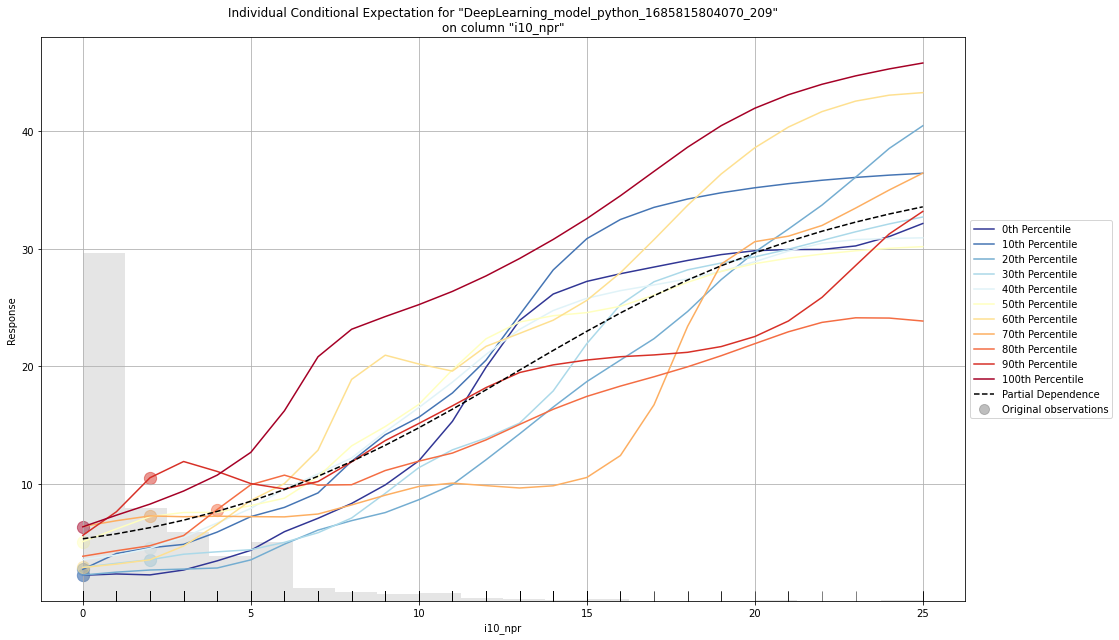

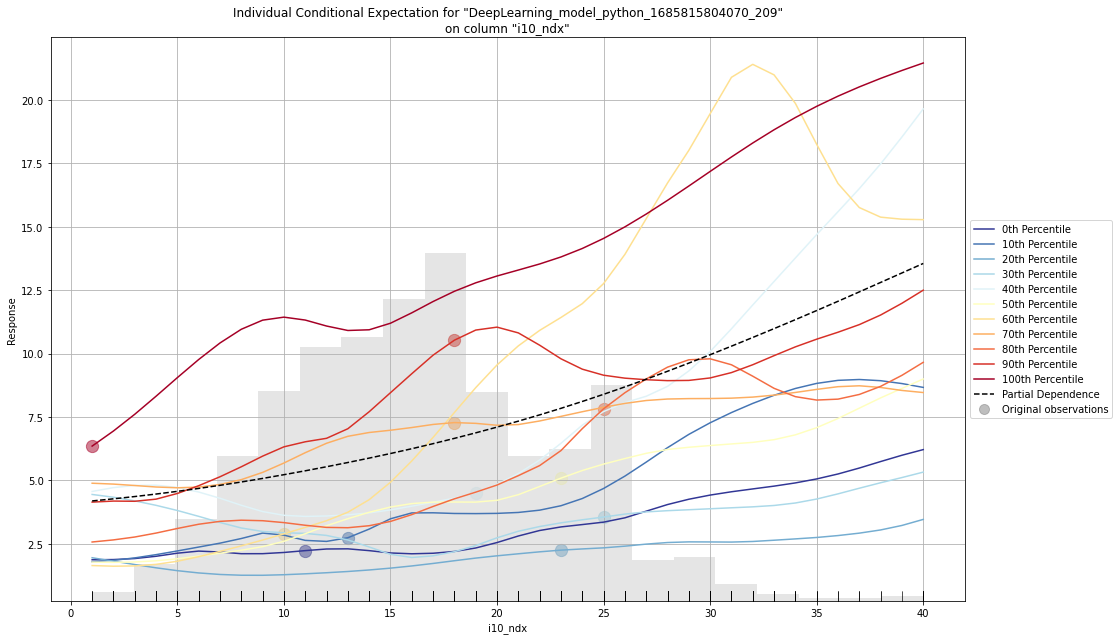

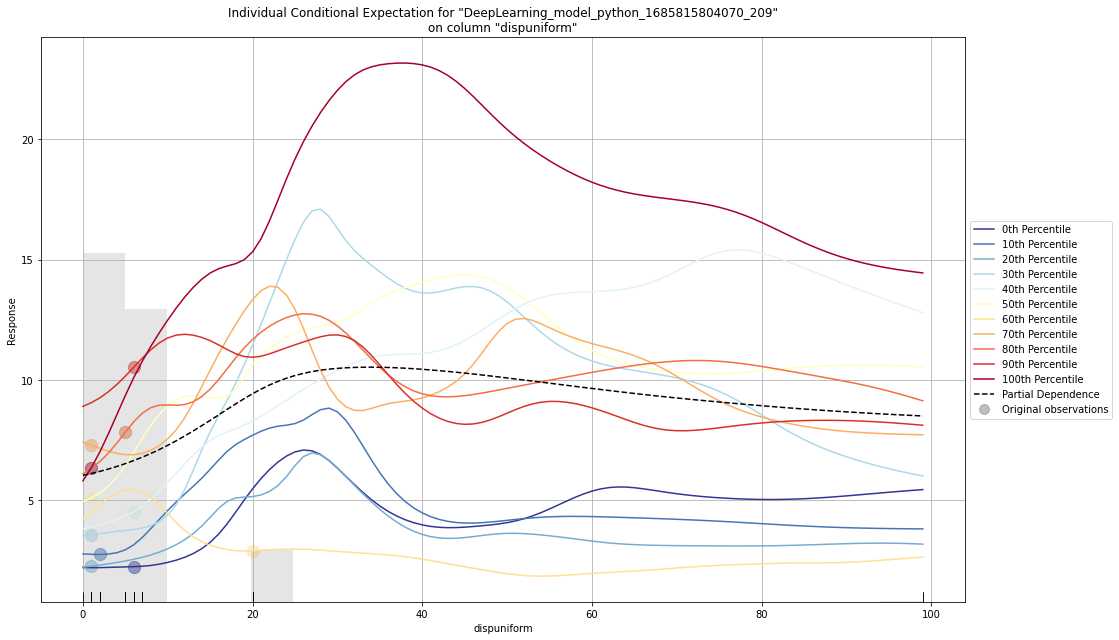

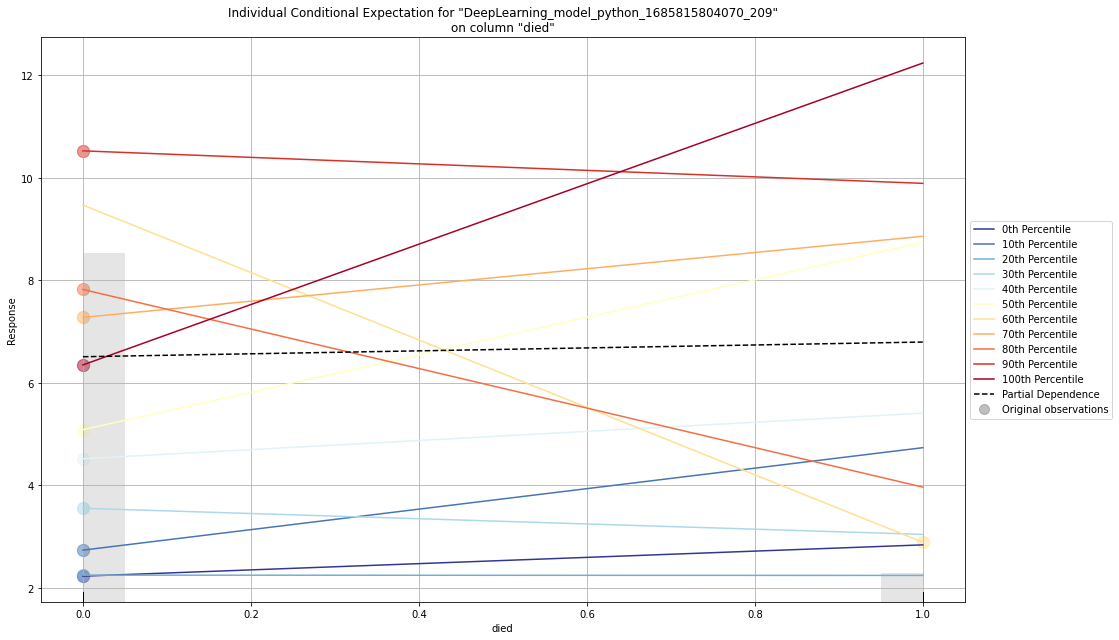



H2OExplanation([('residual_analysis', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x2b4e7f4cd070>), ('description', <h2o.explanation._explain.Description object at 0x2b4e7f3db070>), ('plots', H2OExplanation([('DeepLearning_model_python_1685815804070_209', <h2o.plot._plot_result._MObject object at 0x2b4e7f4999a0>)]))])), ('learning_curve', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x2b4d42b02310>), ('description', <h2o.explanation._explain.Description object at 0x2b4e7f4cdcd0>), ('plots', H2OExplanation([('DeepLearning_model_python_1685815804070_209', <h2o.plot._plot_result._MObject object at 0x2b4e87609ee0>)]))])), ('varimp', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x2b4e8765ca60>), ('description', <h2o.explanation._explain.Description object at 0x2b4e875d4820>), ('plots', H2OExplanation([('DeepLearning_model_python_1685815804070_209', <h2o.plot._plot_result._MObject object at 0x2b4e87702af0>)]))])), 

In [17]:
leader_model = dl
explanation = leader_model.explain(test)
print(explanation)

In [117]:
summary = dl.summary()
print(summary.as_data_frame())



     layer  units    type dropout   l1   l2 mean_rate  rate_rms momentum  \
0        1    650   Input     0.0                                          
1        2    200    Tanh     0.0  0.0  0.0  0.164155  0.192924      0.0   
2        3    200    Tanh     0.0  0.0  0.0  0.020912  0.031109      0.0   
3        4      1  Linear          0.0  0.0  0.000398  0.000003      0.0   

  mean_weight weight_rms mean_bias  bias_rms  
0                                             
1    0.012176   0.408237  0.044167  0.733836  
2   -0.001708   0.496004 -0.019287  2.490405  
3   -0.002895   0.065551  4.425064       0.0  
